## 1. About the code 💪

### Dataset problems

This dataset contains information about Titanic passengers such as gender, age, and detail of each passengers (ticket class, fare, cabin number)

#### Objectives of Notebook 📌
👉 This notebook aims to:

- Dataset exploration using various types of data visualization.
- Build various ML models that can predict survivor of titanic passenger.


#### Description 🧾
👉 There are 12 variables in this dataset:

- 4 categorical variables,
- 4 continuous variables,
- 1 variable that contains ID of passenger,
- 1 variable to accommodate the name of passenger,
- 1 variable that stores ticket number, and
- 1 variable with various cabin number.

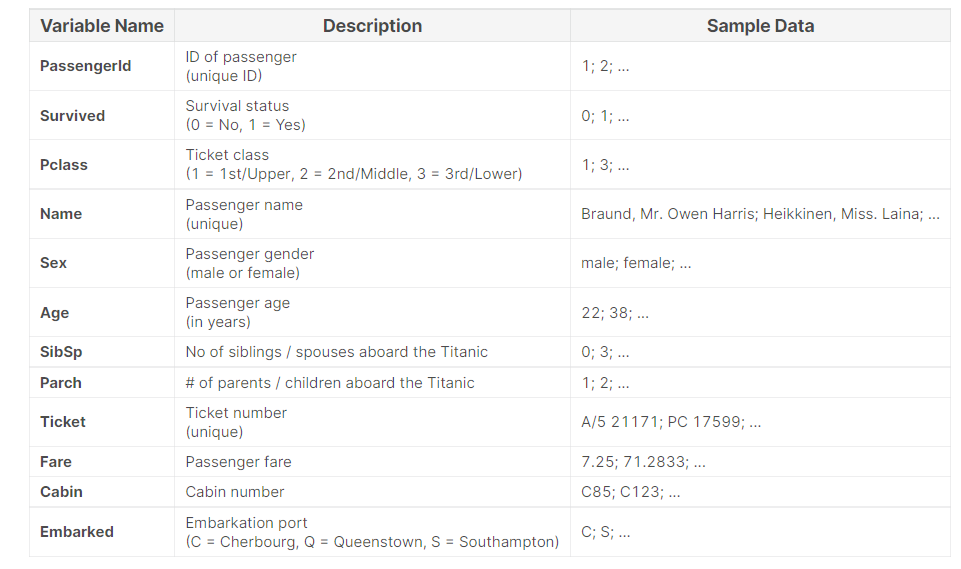

## 2. Importing Libraries 📚

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
import seaborn as sns
import warnings
import os
import xgboost as xgb

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.templates
import plotly.offline as py
py.init_notebook_mode(connected=True)
plt.style.use('seaborn-notebook')
import plotly.graph_objs as go
import plotly.tools as tls

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.ensemble import (RandomForestClassifier, AdaBoostClassifier, 
                              GradientBoostingClassifier, ExtraTreesClassifier)
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelBinarizer
from sklearn.svm import SVC

warnings.simplefilter(action='ignore', category=FutureWarning)

### 3. Reading dataset

In [ ]:
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### 4. Data Exploration

#### 4.1 Survived Distribution

In [ ]:
train_df.Survived.value_counts() 

0    549
1    342
Name: Survived, dtype: int64

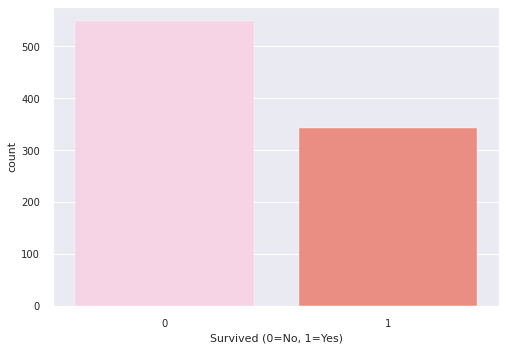

In [ ]:
sns.countplot(x="Survived", data=train_df, palette="Set3_r")  #https://seaborn.pydata.org/tutorial/color_palettes.html
plt.xlabel('Survived (0=No, 1=Yes)') 
plt.show()

#### If we want to know the ratio of people who died or survived:

In [ ]:
countNotSurvived = len(train_df[train_df.Survived == 0])
countSurvived = len(train_df[train_df.Survived == 1])
print("Not Survive Percentage: {:.2f}%".format((countNotSurvived / (len(train_df.Survived))*100)))
print("Survive Percentage: {:.2f}%".format((countSurvived / (len(train_df.Survived))*100)))

Not Survive Percentage: 61.62%
Survive Percentage: 38.38%


The data above show us that most passengers are not survived 😞

### 4.2 Gender Distribution

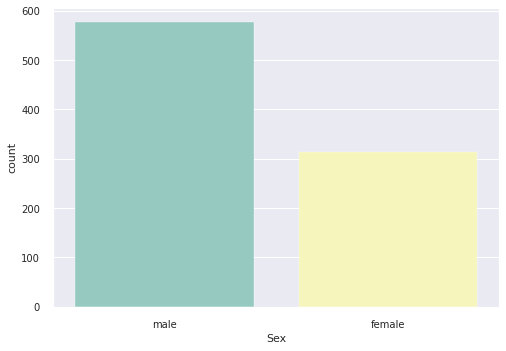

In [ ]:
sns.countplot(x='Sex', data=train_df, palette="Set3")
plt.xlabel("Sex")
plt.show()

In [ ]:
countFemale = len(train_df[train_df.Sex == "female"])
countMale = len(train_df[train_df.Sex == "male"])
print("Female Percentage: {:.2f}%".format((countFemale / (len(train_df.Sex))*100)))
print("Male Percentage: {:.2f}%".format((countMale / (len(train_df.Sex))*100)))

Female Percentage: 35.24%
Male Percentage: 64.76%


We can see that percentage of male passenger is higher than female passengers

### 4.3 Survived Distribution based on Gender 💑

In [ ]:
women = train_df.loc[train_df.Sex == 'female']["Survived"]
rate_women = sum(women)/len(women)

print("Percentage of women who survived: {:.2f}%".format((rate_women*100)))

Percentage of women who survived: 74.20%


In [ ]:
men = train_df.loc[train_df.Sex == 'male']["Survived"]
rate_men = sum(men)/len(men)

print("Percentage of men who survived: {:.2f}%".format((rate_men*100)))

Percentage of men who survived: 18.89%


Text(0, 0.5, 'Frequency')

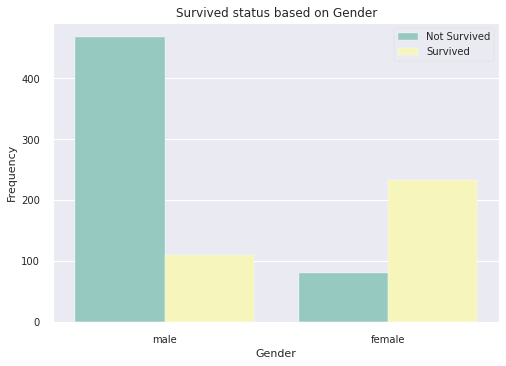

In [ ]:
ax = sns.countplot(x="Sex", hue="Survived", data=train_df, palette="Set3")
plt.title('Survived status based on Gender')
plt.xlabel('Gender')
plt.legend(["Not Survived", "Survived"])
plt.ylabel('Frequency')  #https://seaborn.pydata.org/generated/seaborn.countplot.html

- The number of **female passengers that are survived is higher** than not survived.
- The number of male passengers that are not survived is higher than survived.

We see that female passengers had a higher chance of survival than male ones. It was expected that females and children would be more likely to survive, as the evacuation protocol of the ship was instructing accordingly. 

### 4.4 Survived Distribution based on Age 🧑

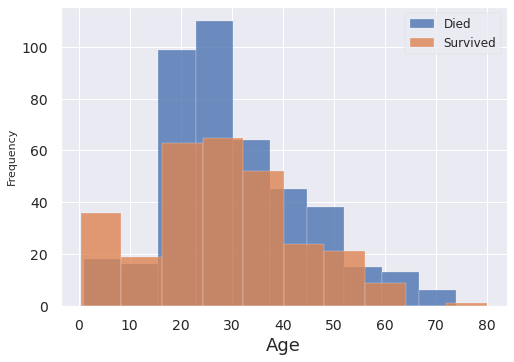

In [ ]:
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

plt.figure()
fig = train_df.groupby('Survived')['Age'].plot.hist(histtype= 'bar', alpha = 0.8)
plt.legend(('Died','Survived'), fontsize = 12)
plt.xlabel('Age', fontsize = 18)
plt.show()

In [ ]:
for data in train_df:
    mean = train_df["Age"].mean()
    std = train_df["Age"].std()
    is_null = train_df["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = train_df["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    train_df["Age"] = age_slice

In [ ]:
for data in test_df:
    mean = test_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = test_df["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = test_df["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    test_df["Age"] = age_slice

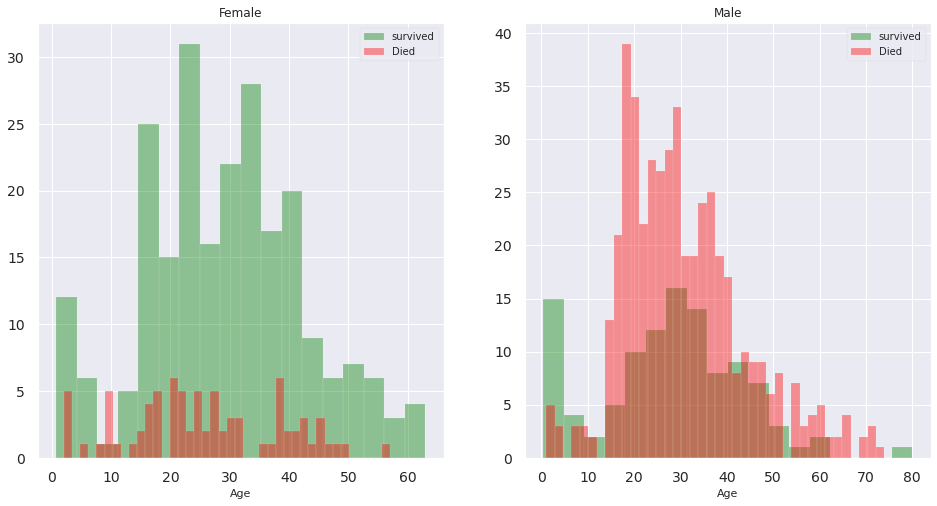

In [ ]:
survived = 'survived'
not_survived = 'Died'
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(16, 8))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
ax = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[0], kde =False, color="green")
ax = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[0], kde =False, color="red")
ax.legend()
ax.set_title('Female')
ax = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, label = survived, ax = axes[1], kde = False, color="green")
ax = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = not_survived, ax = axes[1], kde = False, color="red")
ax.legend()
_ = ax.set_title('Male');

#### 4.5 Survived Distribution based on Passenger class

In [ ]:
train_df.Pclass.value_counts() 

3    491
1    216
2    184
Name: Pclass, dtype: int64

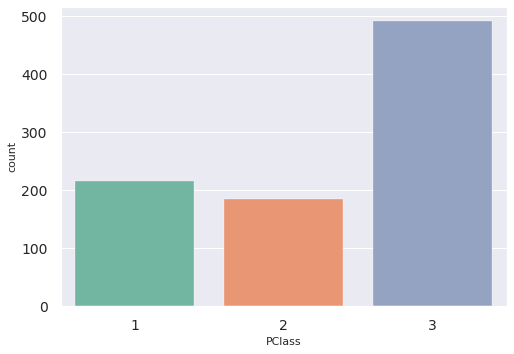

In [ ]:
sns.countplot(x='Pclass', data=train_df, palette="Set2")
plt.xlabel("PClass")
plt.show()

In [ ]:
count_class1 = len(train_df[train_df.Pclass == 1])
count_class2 = len(train_df[train_df.Pclass == 2])
count_class3 = len(train_df[train_df.Pclass == 3])
print("First class Percentage: {:.2f}%".format((count_class1  / (len(train_df.Pclass))*100)))
print("Second class Percentage: {:.2f}%".format((count_class2  / (len(train_df.Pclass))*100)))
print("Third class Percentage: {:.2f}%".format((count_class3  / (len(train_df.Pclass))*100)))

First class Percentage: 24.24%
Second class Percentage: 20.65%
Third class Percentage: 55.11%


Text(0, 0.5, 'Frequency')

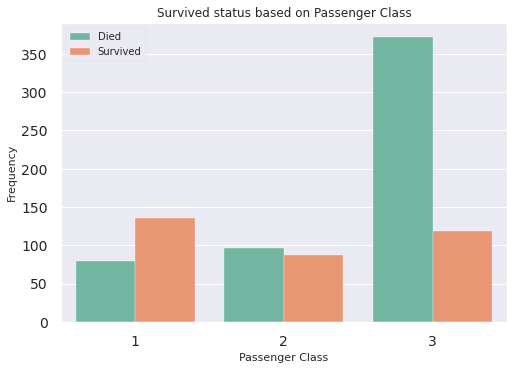

In [ ]:
ax = sns.countplot(x="Pclass", hue="Survived", data=train_df, palette="Set2")
plt.title('Survived status based on Passenger Class')
plt.xlabel('Passenger Class')
plt.legend(["Died", "Survived"])
plt.ylabel('Frequency') 

In [ ]:
survived_class1 = train_df.loc[train_df.Pclass == 1]["Survived"]
rate_class1 = sum(survived_class1)/len(survived_class1)

In [ ]:
survived_class2 = train_df.loc[train_df.Pclass == 2]["Survived"]
rate_class2 = sum(survived_class2)/len(survived_class2)

In [ ]:
survived_class3 = train_df.loc[train_df.Pclass == 3]["Survived"]
rate_class3 = sum(survived_class3)/len(survived_class3)

In [ ]:
print("Percentage of first class who survived: {:.2f}%".format((rate_class1*100)))
print("Percentage of second class who survived: {:.2f}%".format((rate_class2*100)))
print("Percentage of third class who survived: {:.2f}%".format((rate_class3*100)))

Percentage of first class who survived: 62.96%
Percentage of second class who survived: 47.28%
Percentage of third class who survived: 24.24%


Passengers in first class had a high rate of survived: 63%. While, passengers in third class had a very low rate: 24%.

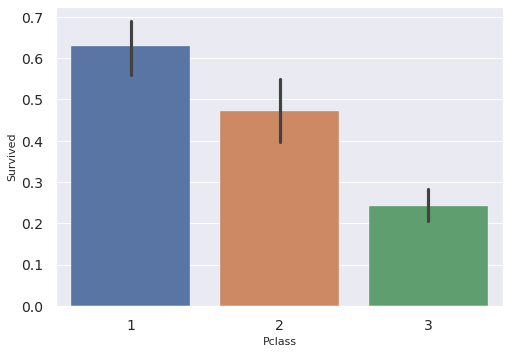

In [ ]:
sns.barplot(x='Pclass', y='Survived', data=train_df);

#### 4.6 Passenger Class based on gender 

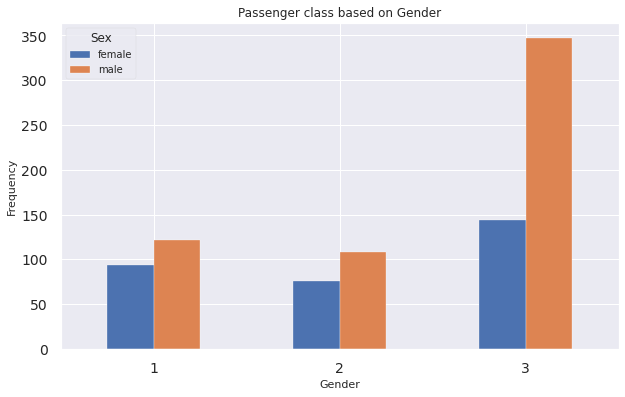

In [ ]:
pd.crosstab(train_df.Pclass,train_df.Sex).plot(kind="bar",figsize=(10,6),)
plt.title('Passenger class based on Gender')
plt.xlabel('Gender')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

👉 El 55% de los pasajeros, pertenecían a la tercera clase, donde apenas sobrevivió el 24%. Gran parte de estos pasajeros eran hombres. 

La clase que más sobrevivió fue la **primera** con más del 60%, con apenas 216 personas abordo.

#### 4.7 Embark

In [ ]:
train_df.Embarked.value_counts() 

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [ ]:
embarked_mode = train_df["Embarked"].mode()

data = [train_df, test_df]

for column in data:
  column["Embarked"] = column["Embarked"].fillna(embarked_mode)

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



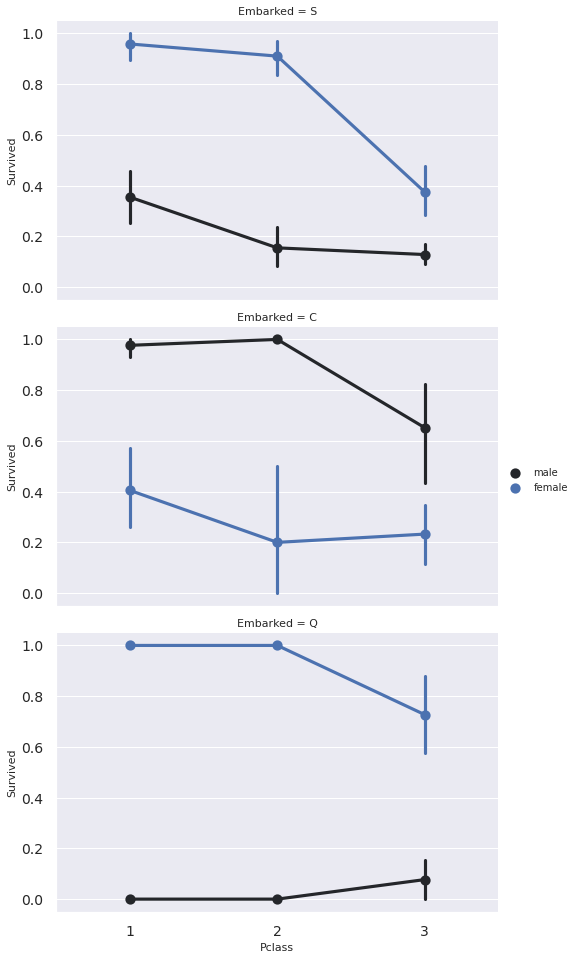

In [ ]:
FacetGrid = sns.FacetGrid(train_df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', order=None, hue_order=None )
FacetGrid.add_legend();

Women will survive more if they embarked from port ‘Southampton’ or ‘ Queenstown’. While men will survive more from the port 'Cherbourg'.

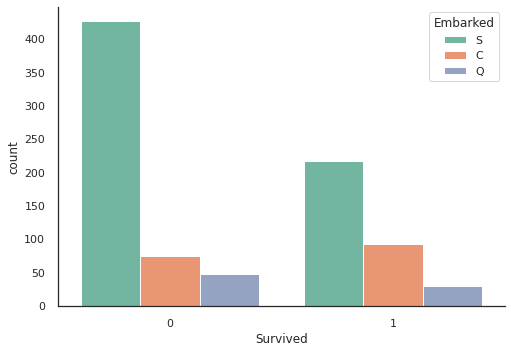

In [ ]:
sns.set(style="white") #darkgrid #whitegrid #ticks  #white
sns.countplot( x='Survived', data=train_df, hue="Embarked", palette="Set2");
sns.despine()


#https://www.codecademy.com/article/seaborn-design-i

In [ ]:
survived_embarked_s = train_df.loc[train_df.Embarked == "S"]["Survived"]
rate_embarked_s = sum(survived_embarked_s)/len(survived_embarked_s)

In [ ]:
survived_embarked_q = train_df.loc[train_df.Embarked == "Q"]["Survived"]
rate_embarked_q = sum(survived_embarked_q)/len(survived_embarked_q)

In [ ]:
survived_embarked_c = train_df.loc[train_df.Embarked == "C"]["Survived"]
rate_embarked_c = sum(survived_embarked_c)/len(survived_embarked_c)

In [ ]:
print("Percentage of passengers embarked in S class who survived: {:.2f}%".format((rate_embarked_s*100)))
print("Percentage of passengers embarked in Q class who survived: {:.2f}%".format((rate_embarked_q*100)))
print("Percentage of passengers embarked in C class who survived: {:.2f}%".format((rate_embarked_c*100)))

Percentage of passengers embarked in S class who survived: 33.70%
Percentage of passengers embarked in Q class who survived: 38.96%
Percentage of passengers embarked in C class who survived: 55.36%


Passengers from port ‘Southampton’ have a low survival rate of 34%, while those from the port ‘Cherbourg’ have a survival rate of 55%. 

#### 4.8 Relatives (SibSp and Parch)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning:

The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.



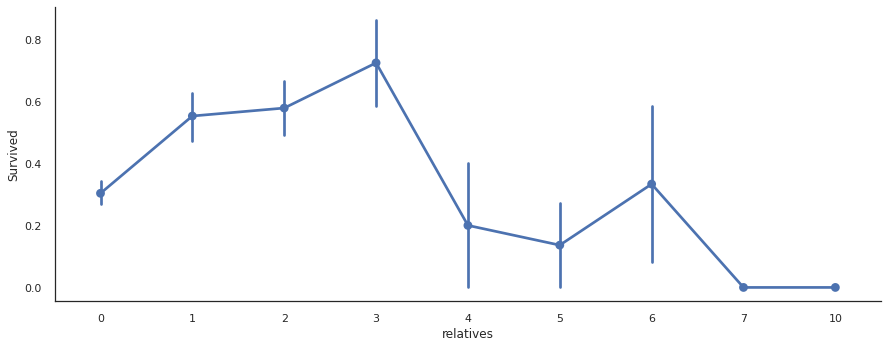

In [ ]:
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'travelled_alone'] = 'No'
    dataset.loc[dataset['relatives'] == 0, 'travelled_alone'] = 'Yes'
axes = sns.factorplot('relatives','Survived', 
                      data=train_df, aspect = 2.5, );

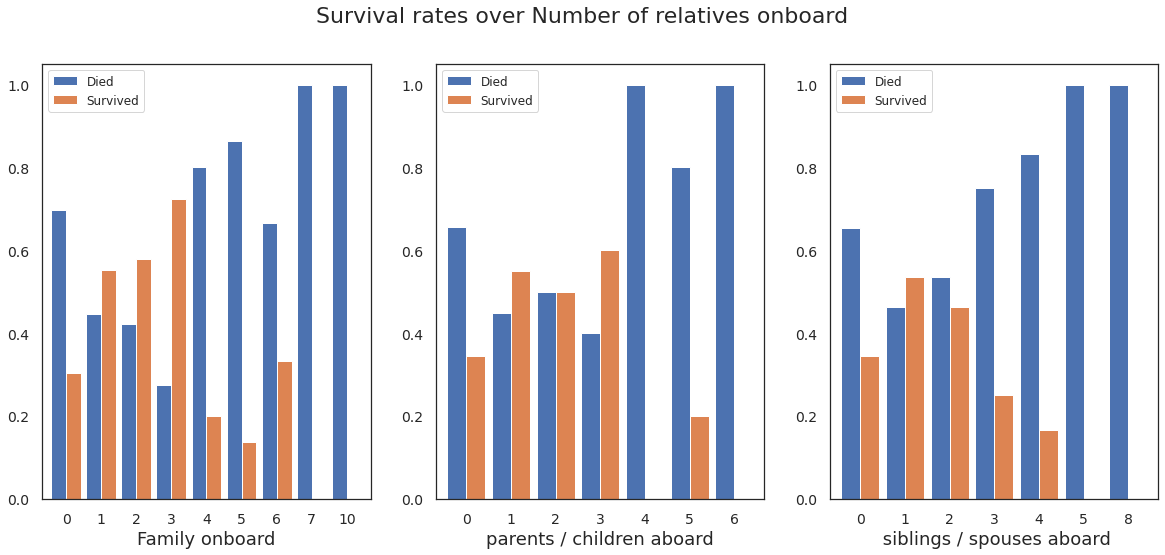

In [ ]:
plt.rcParams['figure.figsize'] = [20, 8]
plt.rc('xtick', labelsize=14) 
plt.rc('ytick', labelsize=14)

fig, axes = plt.subplots(nrows=1, ncols=3)
train_df.groupby(['Parch'])['Survived'].value_counts(normalize=True).unstack().plot.bar(ax=axes[1],width = 0.85)
train_df.groupby(['SibSp'])['Survived'].value_counts(normalize=True).unstack().plot.bar(ax=axes[2],width = 0.85)
train_df.groupby(['relatives'])['Survived'].value_counts(normalize=True).unstack().plot.bar(ax=axes[0],width = 0.85)

axes[0].set_xlabel('Family onboard',fontsize = 18)
axes[1].set_xlabel('parents / children aboard',fontsize = 18)
axes[2].set_xlabel(' siblings / spouses aboard',fontsize = 18)

for i in range(3):
    axes[i].legend(('Died','Survived'),fontsize = 12, loc = 'upper left')

for ax in fig.axes:
    plt.sca(ax)
    plt.xticks(rotation=0)

plt.suptitle('Survival rates over Number of relatives onboard',fontsize =22)
plt.show()

We see a clear trend that the smaller the number of relatives on board, the higher the chance of survival. 

### 4.9 Fare

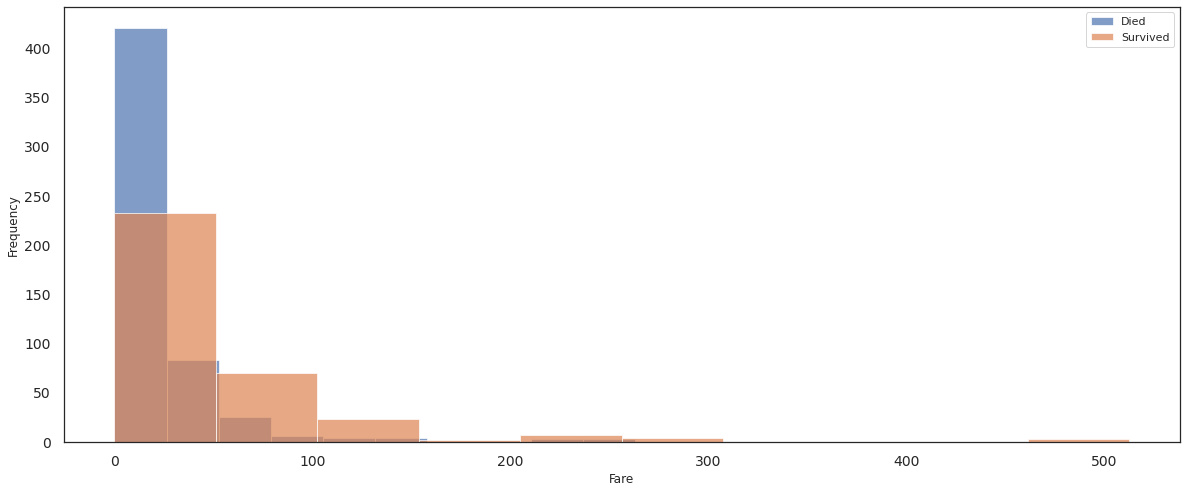

In [ ]:
plt.figure()
fig = train_df.groupby('Survived')['Fare'].plot.hist(histtype= 'bar', alpha = 0.7)
plt.legend(('Died','Survived'))
plt.xlabel('Fare')
plt.show()

plt.rcParams['figure.figsize'] = [15, 5]
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 

#### 4.10 Name

In [ ]:
train_df['Title'] = train_df['Name'].str.split(',',expand = True)[1].str.split('.',expand = True)[0].str.strip() 
#el strip quita los espacios en blanco al inicio y al final
#se separa el nombre del titulo, y luego el titulo del resto de la oración con split

varnames = list(train_df.columns)
for name in varnames:
    print(name+": ",type(train_df.loc[1,name]))

print(list(train_df['Title'].unique()))   

PassengerId:  <class 'numpy.int64'>
Survived:  <class 'numpy.int64'>
Pclass:  <class 'numpy.int64'>
Name:  <class 'str'>
Sex:  <class 'str'>
Age:  <class 'numpy.float64'>
SibSp:  <class 'numpy.int64'>
Parch:  <class 'numpy.int64'>
Ticket:  <class 'str'>
Fare:  <class 'numpy.float64'>
Cabin:  <class 'str'>
Embarked:  <class 'str'>
relatives:  <class 'numpy.int64'>
travelled_alone:  <class 'str'>
Title:  <class 'str'>
['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess', 'Jonkheer']


In [ ]:
train_df.Title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

Some of these titles can be grouped up, since they mean the same thing. For example, "Mrs", "Miss", "Ms" will be grouped together under the label "Mrs". There are also some titles that appear to actually be a name instead of a title (Mlle, Mme) that will also be mapped to the same value. "Don" is probably an abbreviation to a male name and will be mapped to "Mr". Other title categories are "Noble","Master","Dr/Clergy" and "Military".

In [ ]:
def new_titles(df):
    new_titles = dict()
    assert 'Title' in df.columns #https://realpython.com/python-assert-statement/#:~:text=in%20your%20code.-,What%20Are%20Assertions%3F,while%20you%27re%20debugging%20code.
    for key in df['Title'].unique():
        females = ['Mrs','Miss','Ms','Mlle','Mme','Dona']
        males = ['Mr','Don']
        notable = ['Jonkheer','the Countess','Lady','Sir','Major','Col','Capt','Dr','Rev','Notable']
        titles = [females,males,notable,'Master']
        newtitles = ['Mrs','Mr','Notable','Master']
        #idx = [key in sublist for sublist in titles]
        #idx = np.where(idx)[0] 
        #new_titles[key] = newtitles[idx[0]]
    return new_titles


new_titles_dict = new_titles(train_df)
train_df['Title'] = train_df['Title'].replace(new_titles_dict)

We can now check the survival rates for each title to see if there is some useful information here.

In [ ]:
train_df.Title.value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: Title, dtype: int64

<Figure size 864x360 with 0 Axes>

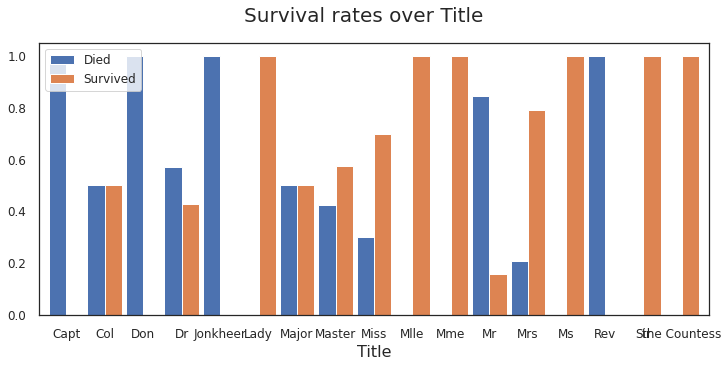

In [ ]:
plt.rcParams['figure.figsize'] = [12, 5]
plt.rc('xtick', labelsize=12) 
plt.rc('ytick', labelsize=12) 

plt.figure()
fig = train_df.groupby(['Title'])['Survived'].value_counts(normalize=True).unstack().plot.bar(width = 0.9)
plt.legend(('Died','Survived'),fontsize = 12, loc = 'upper left')
plt.xlabel('Title',fontsize =16)
plt.xticks(rotation=0)


plt.suptitle('Survival rates over Title',fontsize =20)
plt.show()

Women continue to prove that they were the longest survivors on the Titanic. Even people with a title like "Master" were able to save themselves. Men, on the other hand, were the most affected.

#### 4.11 Cabin

In [ ]:
#train_df['Cabin'][train_df['Cabin'].isnull()]='Missing'
train_df['Cabin'] = train_df['Cabin'].str.split(r'(^[A-Z])',expand = True)[1]

<Figure size 864x360 with 0 Axes>

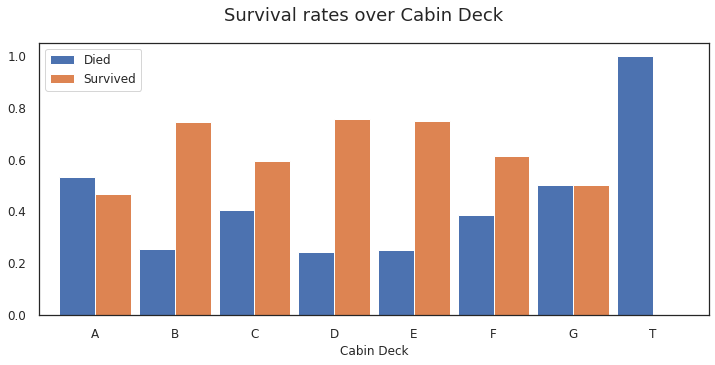

In [ ]:
plt.rcParams['figure.figsize'] = [12, 5]
plt.figure()
fig = train_df.groupby(['Cabin'])['Survived'].value_counts(normalize=True).unstack().plot.bar(width = 0.9)
plt.legend(('Died','Survived'),fontsize = 12, loc = 'upper left')
plt.xlabel('Cabin Deck',fontsize =12)
plt.suptitle('Survival rates over Cabin Deck',fontsize =18)
plt.xticks(rotation=0)
plt.show()

## In conclusion
There are many things for a greater chance to survive. Being a female or a child will increase you chances. If you have a higher class ticket you have the more chance of surviving than a third class ticket. As for a man, you are more likely to survive if embark in Cherbourg compare to Southampton or Queenstown. If you also travel with 1 or 3 people than 0 or more than 3 your survival chances are greater. The younger you are will also make your survival chance. So it comes down to many things to surivive on the titanic.

#### 5. Dataset Preprocessing 🧹

In [ ]:
train_df.isnull().sum()

PassengerId          0
Survived             0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 0
Cabin              687
Embarked             2
relatives            0
travelled_alone      0
Title                0
dtype: int64

In [ ]:
test_df.isnull().sum()

PassengerId          0
Pclass               0
Name                 0
Sex                  0
Age                  0
SibSp                0
Parch                0
Ticket               0
Fare                 1
Cabin              327
Embarked             0
relatives            0
travelled_alone      0
dtype: int64

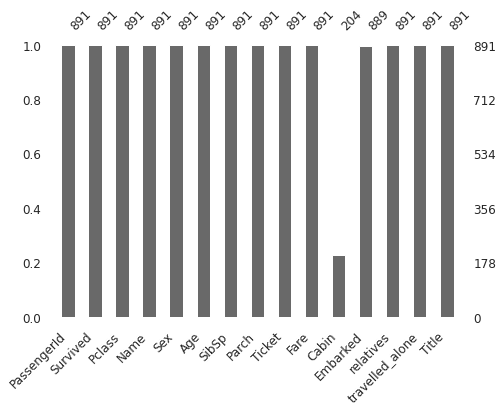

In [ ]:
plt.figure(figsize = (16, 5))
ax_train = plt.subplot(1,2,2)
mso.bar(train_df, ax = ax_train, fontsize = 12)

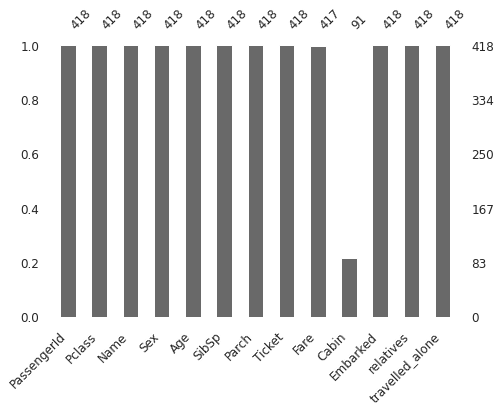

In [ ]:
plt.figure(figsize = (16, 5))
ax_train = plt.subplot(1,2,2)
mso.bar(test_df, ax = ax_train, fontsize = 12)

👉 Missing Values detected in "Embarked" column in train dataset. 
Recordemos que al principio teníamos valores perdidos en "Age", "Cabin", and "Embarked", pero en el caso de las dos primeras, tuvieron un tratamiento para lidiar con dichos casos. 

Podríamos usar las siguientes técnicas: 


### 5.2 Replacing Missing Values 📝

Imputation is a technique for substituting an estimated value for missing values in a dataset. In this section, the imputation will be performed for variables that have missing values.

In [ ]:
# Age (with mean)
#train_df['Age'] = train_df['Age'].fillna(train_df['Age'].mean())
#test_df['Age'] = test_df['Age'].fillna(test_df['Age'].mean())

In [ ]:
# Fare (with mean)
test_df['Fare'] = test_df['Fare'].fillna(test_df['Fare'].mean())

### 5.3 Distribution of Numerical Value 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f090282e950>,
      dtype=object)

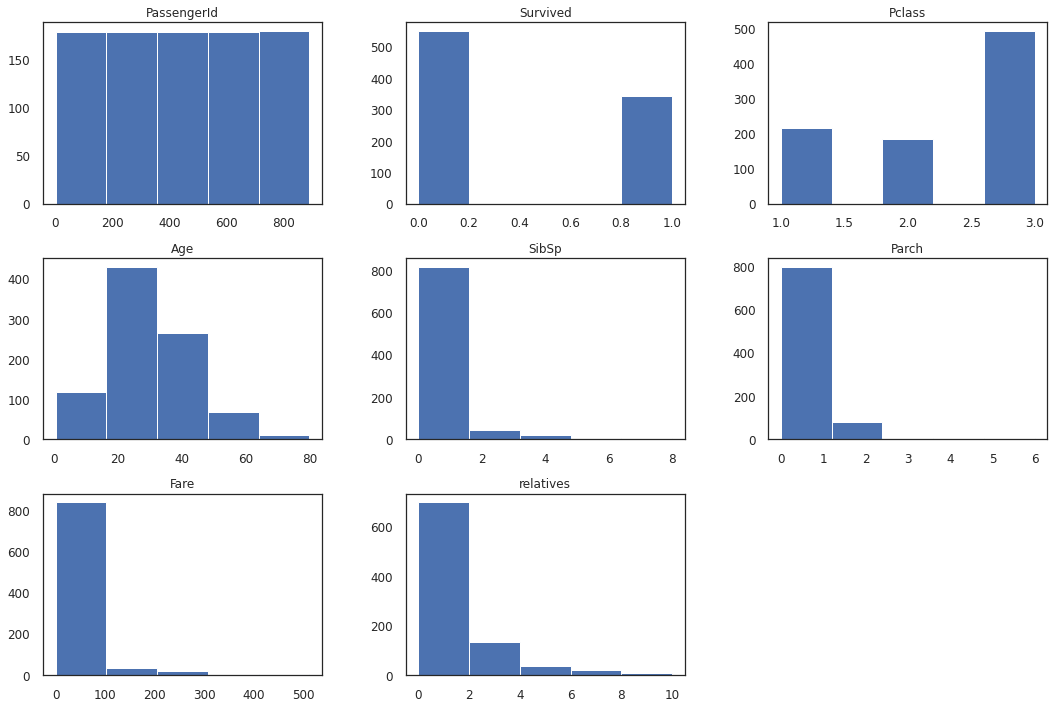

In [ ]:
train_df.hist(grid=False, figsize=(18, 12), bins=5)

In [ ]:
train_df.skew(axis = 0, skipna = True)

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Age            0.399523
SibSp          3.695352
Parch          2.749117
Fare           4.787317
relatives      2.727441
dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f090282e0d0>,
      dtype=object)

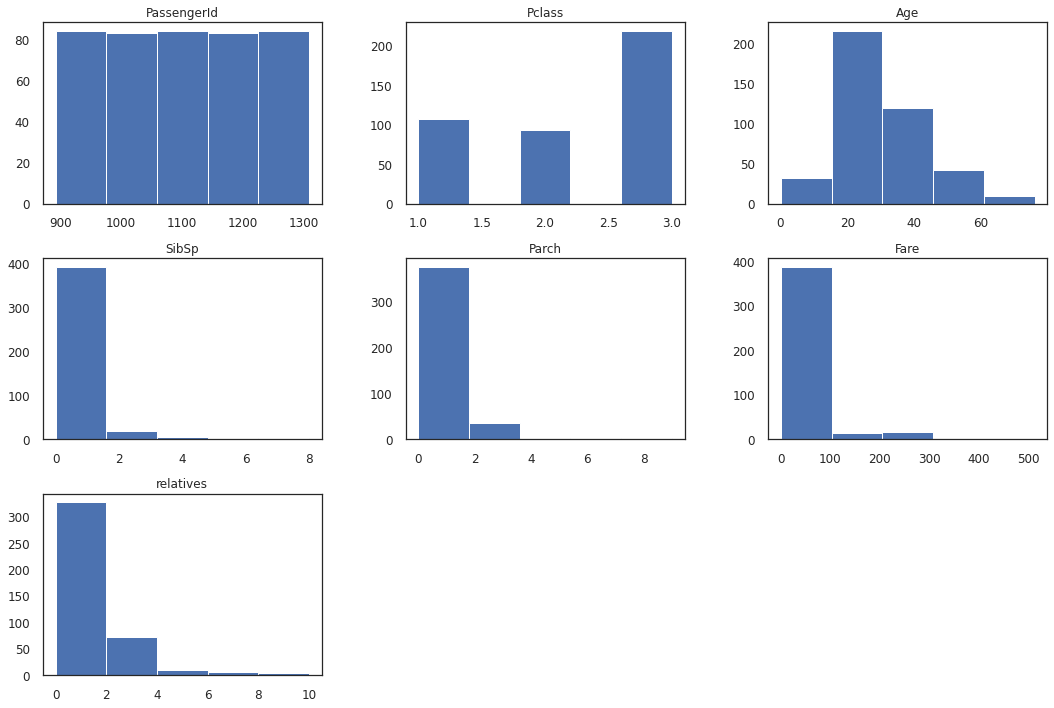

In [ ]:
test_df.hist(grid=False, figsize=(18, 12), bins=5)

In [ ]:
test_df.skew(axis = 0, skipna = True)

PassengerId    0.000000
Pclass        -0.534170
Age            0.499354
SibSp          4.168337
Parch          4.654462
Fare           3.691600
relatives      3.168542
dtype: float64

Skewness of Fare, SibSp, and Parch is high, square root transformation will be performed for test and training

#### 5.4 Square root transformation

In [ ]:
train_df.Fare = np.sqrt(train_df.Fare)
test_df.Fare = np.sqrt(test_df.Fare)

train_df.SibSp = np.sqrt(train_df.SibSp)
test_df.SibSp = np.sqrt(test_df.SibSp)

train_df.Parch = np.sqrt(train_df.Parch)
test_df.Parch = np.sqrt(test_df.Parch)

#### 5.5 Categorical Variables

The method used is one-hot encoding, which is transforming categorical variables into a form that could be provided to ML algorithms to do a better prediction.

In [ ]:
# Categorical columns in the training data
#object_cols = [col for col in train_df.columns if train_df[col].dtype == "object"]

In [ ]:
#low_cardinality_cols = [col for col in object_cols if train_df[col].nunique() < 4]

In [ ]:
#from sklearn.preprocessing import OneHotEncoder

# Apply one-hot encoder to each column with categorical data
#OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
#OH_cols_train = pd.DataFrame(OH_encoder.fit_transform(train_df[low_cardinality_cols]))
#OH_cols_test = pd.DataFrame(OH_encoder.transform(test_df[low_cardinality_cols]))

In [ ]:
train_df = pd.get_dummies(train_df, columns=['Sex', 'Embarked', 'Pclass'])
test_df = pd.get_dummies(test_df, columns=['Sex', 'Embarked', 'Pclass'])

In [ ]:
train_df.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,relatives,travelled_alone,Title,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Pclass_1,Pclass_2,Pclass_3
0,1,0,"Braund, Mr. Owen Harris",22.0,1.0,0.0,A/5 21171,2.692582,NaN,1,No,Mr,0,1,0,0,1,0,0,1
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1.0,0.0,PC 17599,8.442944,C,1,No,Mrs,1,0,1,0,0,1,0,0
2,3,1,"Heikkinen, Miss. Laina",26.0,0.0,0.0,STON/O2. 3101282,2.815138,NaN,0,Yes,Miss,1,0,0,0,1,0,0,1
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1.0,0.0,113803,7.286975,C,1,No,Mrs,1,0,0,0,1,1,0,0
4,5,0,"Allen, Mr. William Henry",35.0,0.0,0.0,373450,2.837252,NaN,0,Yes,Mr,0,1,0,0,1,0,0,1


#### 5.6 Dropping Columns

Since Cabin and Ticket contains unique data, these columns will be removed.

In [ ]:
train_df = train_df.drop(['Cabin','Ticket'], axis = 1)
test_df = test_df.drop(['Cabin','Ticket'], axis = 1)

In [ ]:
train_df1 = train_df.drop(['PassengerId', 'Name'], axis = 1)
test_df1 = test_df.drop(['PassengerId', 'Name'], axis = 1)

In [ ]:
train_df2 = train_df.drop(['travelled_alone', 'Title','PassengerId', 'Name'], axis = 1)
test_df2 = test_df.drop(['travelled_alone','PassengerId', 'Name'], axis = 1)

In [ ]:
train_df.isnull().sum()

PassengerId        0
Survived           0
Name               0
Age                0
SibSp              0
Parch              0
Fare               0
relatives          0
travelled_alone    0
Title              0
Sex_female         0
Sex_male           0
Embarked_C         0
Embarked_Q         0
Embarked_S         0
Pclass_1           0
Pclass_2           0
Pclass_3           0
dtype: int64

In [ ]:
test_df.isnull().sum()

PassengerId        0
Name               0
Age                0
SibSp              0
Parch              0
Fare               0
relatives          0
travelled_alone    0
Sex_female         0
Sex_male           0
Embarked_C         0
Embarked_Q         0
Embarked_S         0
Pclass_1           0
Pclass_2           0
Pclass_3           0
dtype: int64

### 6.0 ML

#### 6.1 Splitting the dataset into 80% training, 20% test

In [ ]:
X = train_df2.drop(["Survived"], axis=1)
y = train_df2["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state = 0)

#### 6.2 SMOTE Technique

In [ ]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)


#SMOTE is an oversampling technique where the synthetic samples are generated for the minority class. 
#This algorithm helps to overcome the overfitting problem posed by random oversampling.

Since the number of not survived passengers is more than survived passengers, oversampling is carried out to avoid overfitting.

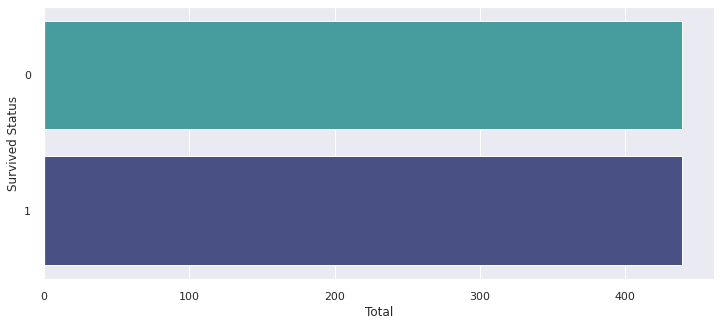

In [ ]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, data=test_df, palette="mako_r")
plt.ylabel('Survived Status')
plt.xlabel('Total')
plt.show()

### 7 Model Building

#### 7.1 Logistic Regression

In [ ]:
LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
LRAcc = accuracy_score(y_pred,y_test)

print('Logistic regression accuracy: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       110
           1       0.76      0.77      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

[[93 17]
 [16 53]]
Logistic regression accuracy: 81.56%


#### 7.2 Decision Tree

In [ ]:
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=10)
DTclassifier.fit(X_train, y_train)

y_pred = DTclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
DTAcc = accuracy_score(y_pred,y_test)

print('Decision tree accuracy: {:.2f}%'.format(DTAcc*100))

              precision    recall  f1-score   support

           0       0.85      0.87      0.86       110
           1       0.79      0.75      0.77        69

    accuracy                           0.83       179
   macro avg       0.82      0.81      0.82       179
weighted avg       0.83      0.83      0.83       179

[[96 14]
 [17 52]]
Decision tree accuracy: 82.68%


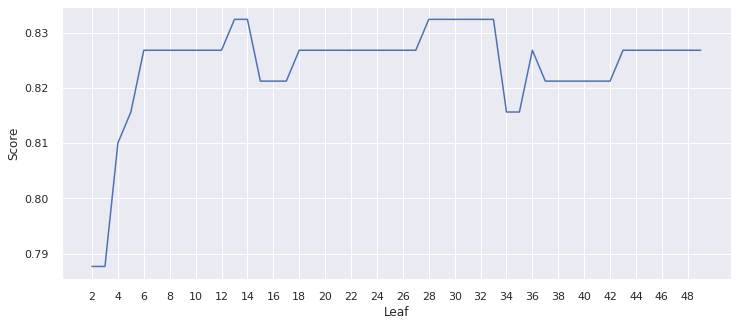

DT Acc Max: 83.24%


In [ ]:
scoreListDT = []
for i in range(2,50):
    DTclassifier = DecisionTreeClassifier(max_leaf_nodes=i)
    DTclassifier.fit(X_train, y_train)
    scoreListDT.append(DTclassifier.score(X_test, y_test))
    
plt.plot(range(2,50), scoreListDT)
plt.xticks(np.arange(2,50,2))
plt.xlabel("Leaf")
plt.ylabel("Score")
plt.show()
DTAccMax = max(scoreListDT)
print("DT Acc Max: {:.2f}%".format(DTAccMax*100))

#### 7.3 Support vector machines (SVMs)

In [ ]:
SVCclassifier = SVC(kernel='linear')
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
SVCAcc = accuracy_score(y_pred,y_test)

print('SVC accuracy: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       110
           1       0.73      0.71      0.72        69

    accuracy                           0.79       179
   macro avg       0.78      0.77      0.77       179
weighted avg       0.79      0.79      0.79       179

[[92 18]
 [20 49]]
SVC accuracy: 78.77%


#### 7.4 K Neighbors Classifier

In [ ]:
KNclassifier = KNeighborsClassifier(n_neighbors=50)
KNclassifier.fit(X_train, y_train)

y_pred = KNclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
KNAcc = accuracy_score(y_pred,y_test)

print('K Neighbors Classifier accuracy: {:.2f}%'.format(KNAcc*100))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       110
           1       0.70      0.65      0.68        69

    accuracy                           0.76       179
   macro avg       0.75      0.74      0.74       179
weighted avg       0.76      0.76      0.76       179

[[91 19]
 [24 45]]
K Neighbors Classifier accuracy: 75.98%


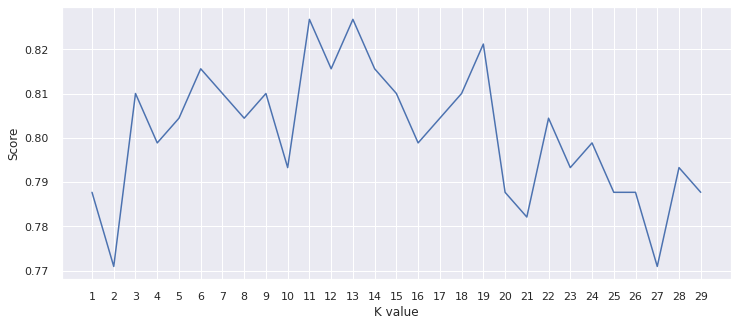

KNN Acc Max: 82.68%


In [ ]:
scoreListknn = []
for i in range(1,30):
    KNclassifier = KNeighborsClassifier(n_neighbors = i)
    KNclassifier.fit(X_train, y_train)
    scoreListknn.append(KNclassifier.score(X_test, y_test))
    
plt.plot(range(1,30), scoreListknn)
plt.xticks(np.arange(1,30,1))
plt.xlabel("K value")
plt.ylabel("Score")
plt.show()
KNAccMax = max(scoreListknn)
print("KNN Acc Max: {:.2f}%".format(KNAccMax*100))

#### 7.5 Random Forest

In [ ]:
RFclassifier = RandomForestClassifier(max_leaf_nodes=10)
RFclassifier.fit(X_train, y_train)

y_pred = RFclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85       110
           1       0.79      0.71      0.75        69

    accuracy                           0.82       179
   macro avg       0.81      0.80      0.80       179
weighted avg       0.81      0.82      0.81       179

[[97 13]
 [20 49]]
Random Forest accuracy is: 81.56%


#### 7.6 Gradient Boosting

In [ ]:
paramsGB={'n_estimators':[100,200,300,400,500],
      'max_depth':[1,2,3,4,5],
      'max_leaf_nodes':[2,5,10,20,30,40,50]}

In [ ]:
GB = RandomizedSearchCV(GradientBoostingClassifier(), paramsGB, cv=10)
GB.fit(X_train,y_train)

RandomizedSearchCV(cv=10, estimator=GradientBoostingClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5],
                                        'max_leaf_nodes': [2, 5, 10, 20, 30, 40,
                                                           50],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]})

In [ ]:
print(GB.best_estimator_)
print(GB.best_score_)
print(GB.best_params_)
print(GB.best_index_)

GradientBoostingClassifier(max_depth=4, max_leaf_nodes=10, n_estimators=200)
0.8452847439916406
{'n_estimators': 200, 'max_leaf_nodes': 10, 'max_depth': 4}
6


In [ ]:
GBclassifier = GradientBoostingClassifier(n_estimators=400, max_depth=3, max_leaf_nodes=10)
GBclassifier.fit(X_train, y_train)

y_pred = GBclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
GBAcc = accuracy_score(y_pred,y_test)
print('Gradient Boosting accuracy is: {:.2f}%'.format(GBAcc*100))

              precision    recall  f1-score   support

           0       0.84      0.87      0.86       110
           1       0.78      0.74      0.76        69

    accuracy                           0.82       179
   macro avg       0.81      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179

[[96 14]
 [18 51]]
Gradient Boosting accuracy is: 82.12%


In [ ]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'Decision Tree', 'SVC', 'K Neighbors Classifier', 'Random Forest Classifier'
                                 , 'K Neighbors Max', 'Decision Tree Max', 'Gradient Boosting'], 
                        'Accuracy': [LRAcc*100, DTAcc*100, SVCAcc*100 , KNAcc*100, RFAcc*100, 
                                     KNAccMax*100, DTAccMax*100, GBAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
6,Decision Tree Max,83.240223
1,Decision Tree,82.681564
5,K Neighbors Max,82.681564
7,Gradient Boosting,82.122905
0,Logistic Regression,81.564246
4,Random Forest Classifier,81.564246
2,SVC,78.770950
3,K Neighbors Classifier,75.977654


In [ ]:
RFclassifier = RandomForestClassifier(n_estimators = 1000, random_state = 1, max_leaf_nodes=48)
RFclassifier.fit(X_train, y_train)
scoreListRF.append(RFclassifier.score(X_test, y_test))

prediction = RFclassifier.predict(test_df2)

In [ ]:
output = pd.DataFrame({'PassengerId': test_df['PassengerId'] , 'Survived': prediction})
output.to_csv('submission.csv', index=False)

In [ ]:
predcsv = pd.read_csv('./submission.csv')
predcsv.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
